# In this Notebook, we analyse the relation between past and present temperatures of the french city Nice
# We use the Request Method from the French gov API to get the data, and The autocorrelation and partial Autocorrelation to analyse it


In [261]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

In [262]:
from datetime import datetime

In [263]:
pd.options.display.max_columns = 100

In [264]:
x = requests.get("https://public.opendatasoft.com/api/records/1.0/search/?dataset=donnees-synop-essentielles-omm&q=date%3A%5B2018-03-31T23%3A00%3A00Z+TO+2022-04-01T22%3A59%3A59Z%5D&rows=10000&sort=date&facet=date&facet=nom&facet=temps_present&facet=libgeo&facet=nom_epci&facet=nom_dept&facet=nom_reg&refine.nom=NICE&timezone=Europe%2FParis")
json_data = x.json()
lst = []
for k in json_data['records'] :
    lst.append(k['fields'])
x = pd.DataFrame(lst)
x = x[['date','nom_reg','nom','tc','u','rr24']]
x = x.rename(columns={'nom_reg':'region','tc' : 'temperature', 'u':'humidite', 'rr24' : 'Precipitation'})


In [269]:
x['date']= pd.to_datetime(x['date'],utc = True)
x.index  =  pd.to_datetime(x['date'])
x = x.drop(columns = ['region','date'] )

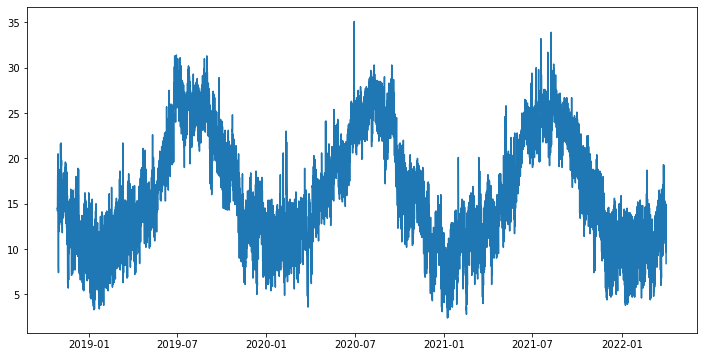

In [259]:
plt.figure(figsize=(12,6))
plt.plot(x['temperature'])

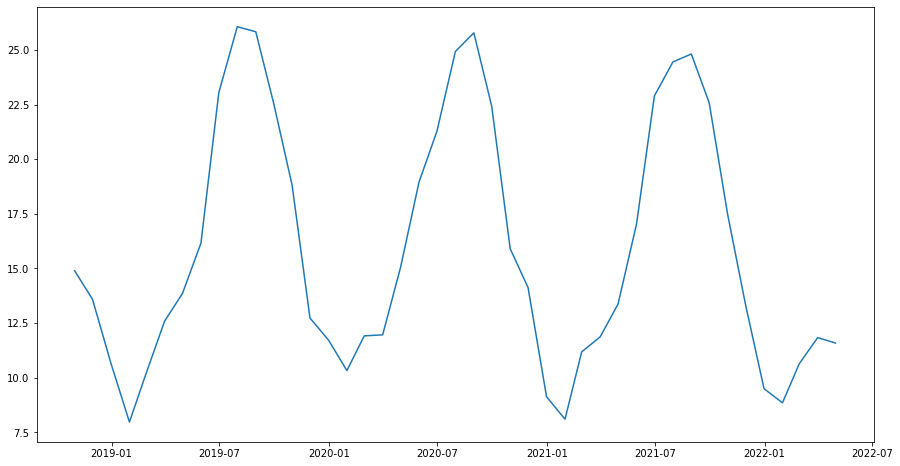

In [301]:
df_month = x.resample('M').mean()
plt.figure(figsize=(15,8))
plt.plot(df_month['temperature'])


In [310]:
df_month

,temperature,humidite,Precipitation
date,,,
2018-10-31 00:00:00+00:00,14.893333,73.700000,14.370000
2018-11-30 00:00:00+00:00,13.590833,71.520833,5.648117
2018-12-31 00:00:00+00:00,10.656855,67.423387,1.827016
2019-01-31 00:00:00+00:00,7.973790,56.697581,0.061506
2019-02-28 00:00:00+00:00,10.197768,65.111607,3.286547
2019-03-31 00:00:00+00:00,12.589919,57.673387,-0.009677
2019-04-30 00:00:00+00:00,13.856667,67.833333,4.548908
2019-05-31 00:00:00+00:00,16.157258,72.995968,0.574694
2019-06-30 00:00:00+00:00,23.045417,69.025000,0.042259


In [303]:
from scipy import stats
import statsmodels.api as sm

Dickey–Fuller test: p=0.868038


<Figure size 1800x432 with 0 Axes>

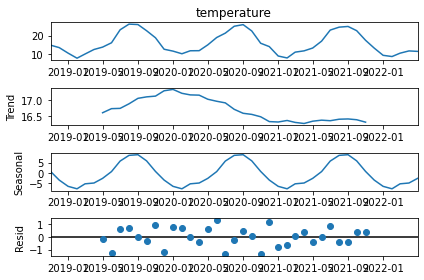

In [309]:
plt.figure(figsize=[25,6])
sm.tsa.seasonal_decompose(df_month.temperature).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.temperature)[1])
plt.show()

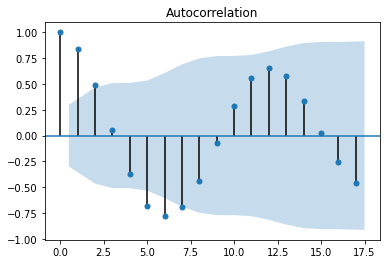

In [290]:
acf_plot = plot_acf(df_month.temperature)

# Based on decaying ACF, we are likely dealing with an Auto Regressive process

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


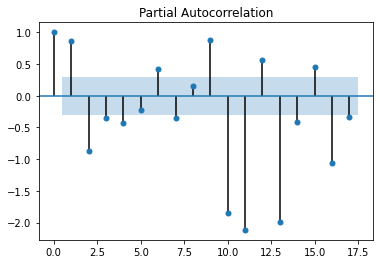

In [318]:
pacf_plot = plot_pacf(df_month.temperature)

# Based on PACF, we should start with an Auto Regressive model with lags 1, 2, 3, 10, 11,14
